In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3

In [39]:
conn = sqlite3.connect("airline")

In [40]:
# create cursor
cur = conn.cursor()

# pull the first five rows
cur.execute("SELECT * FROM airline_safety limit 5;").fetchall()

[('Aer Lingus', '320906734', '2', '0', '0', '0', '0', '0'),
 ('Aeroflot*', '1197672318', '76', '14', '128', '6', '1', '88'),
 ('Aerolineas Argentinas', '385803648', '6', '0', '0', '1', '0', '0'),
 ('Aeromexico*', '596871813', '3', '1', '64', '5', '0', '0'),
 ('Air Canada', '1865253802', '2', '0', '0', '2', '0', '0')]

In [41]:
# Connect to dataframe

df = pd.read_sql_query("SELECT * FROM airline_safety;", conn)

### Initial Data Peek

In [42]:
df.head()

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
0,Aer Lingus,320906734,2,0,0,0,0,0
1,Aeroflot*,1197672318,76,14,128,6,1,88
2,Aerolineas Argentinas,385803648,6,0,0,1,0,0
3,Aeromexico*,596871813,3,1,64,5,0,0
4,Air Canada,1865253802,2,0,0,2,0,0


In [43]:
df.loc[df.airline == 'Aeroflot*']

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
1,Aeroflot*,1197672318,76,14,128,6,1,88


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   airline                 56 non-null     object
 1   avail_seat_km_per_week  56 non-null     object
 2   incidents_85_99         56 non-null     object
 3   fatal_accidents_85_99   56 non-null     object
 4   fatalities_85_99        56 non-null     object
 5   incidents_00_14         56 non-null     object
 6   fatal_accidents_00_14   56 non-null     object
 7   fatalities_00_14        56 non-null     object
dtypes: object(8)
memory usage: 3.6+ KB


### Data Type Cleaning

#### Conver to Int Data Type

In [45]:
cols = list(df.columns)
cols.remove('airline')

for col in cols:
    df[col] = df[col].astype(int)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   airline                 56 non-null     object
 1   avail_seat_km_per_week  56 non-null     int64 
 2   incidents_85_99         56 non-null     int64 
 3   fatal_accidents_85_99   56 non-null     int64 
 4   fatalities_85_99        56 non-null     int64 
 5   incidents_00_14         56 non-null     int64 
 6   fatal_accidents_00_14   56 non-null     int64 
 7   fatalities_00_14        56 non-null     int64 
dtypes: int64(7), object(1)
memory usage: 3.6+ KB


In [47]:
# Check for null
df.isnull().sum()

airline                   0
avail_seat_km_per_week    0
incidents_85_99           0
fatal_accidents_85_99     0
fatalities_85_99          0
incidents_00_14           0
fatal_accidents_00_14     0
fatalities_00_14          0
dtype: int64

### Calculating Accident Rates

Calculate crash rates on per trillion bases. We also must account for the fact that ASK value is given on a per week basis so we must calculate ASK values by multiplying by weeks and number of years.

Metric Definitions:

* `incidents`: Count of "dangerous" incidents whether or not they resulted in any fatalities
* `fatal incidents`: Count of incidents where a member of the passenger or crew died.
* `fatalities`: Total number of deaths among passengers and crew
* `avail_seat_km_per_week`: This measure captures the total flight passenger cpacity of an ailrine in kilometers. Obtained by multiplying the total number of seats available for scheduled passengers and the total number of kilometeres in which those seats were flown.

Some helpful links: https://fivethirtyeight.com/features/should-travelers-avoid-flying-airlines-that-have-had-crashes-in-the-past/

In [48]:
df['avail_seat_km'] = (df.avail_seat_km_per_week * 52 * 15)

In [49]:
df['incident_rate_85_99'] = 1000000000000 *  df.incidents_85_99 / (df.avail_seat_km)
df['fatal_accidents_rate_85_99'] = 1000000000000 *  df.fatal_accidents_85_99 / (df.avail_seat_km)
df['fatalities_rate_85_99'] = 1000000000000 *  df.fatalities_85_99 / (df.avail_seat_km)                                  

In [50]:
df['incident_rate_00_14'] = 1000000000000 *  df.incidents_00_14 / (df.avail_seat_km)
df['fatal_accidents_rate_00_14'] = 1000000000000 *  df.fatal_accidents_00_14 / (df.avail_seat_km)
df['fatalities_rate_00_14'] = 1000000000000 *  df.fatalities_00_14 / (df.avail_seat_km)                                  

### Convert to Normal Table Structure

In [51]:
# look at the data structure
df.head(3)

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14,avail_seat_km,incident_rate_85_99,fatal_accidents_rate_85_99,fatalities_rate_85_99,incident_rate_00_14,fatal_accidents_rate_00_14,fatalities_rate_00_14
0,Aer Lingus,320906734,2,0,0,0,0,0,250307252520,7.990180,0.000000,0.000000,0.000000,0.000000,0.000000
1,Aeroflot*,1197672318,76,14,128,6,1,88,934184408040,81.354387,14.986334,137.017915,6.422715,1.070452,94.199817
2,Aerolineas Argentinas,385803648,6,0,0,1,0,0,300926845440,19.938401,0.000000,0.000000,3.323067,0.000000,0.000000


In [52]:
df_melt = df.copy()

In [53]:
cols = list(df_melt.columns)
cols.remove("airline")
cols.remove("avail_seat_km_per_week")
cols.remove("avail_seat_km")
df_melt = pd.melt(df_melt, id_vars=['airline', 'avail_seat_km'], value_vars=cols)

In [54]:
df_melt.loc[df_melt.airline=='Aeroflot*']

,airline,avail_seat_km,variable,value
1,Aeroflot*,934184408040,incidents_85_99,76.000000
57,Aeroflot*,934184408040,fatal_accidents_85_99,14.000000
113,Aeroflot*,934184408040,fatalities_85_99,128.000000
169,Aeroflot*,934184408040,incidents_00_14,6.000000
225,Aeroflot*,934184408040,fatal_accidents_00_14,1.000000
281,Aeroflot*,934184408040,fatalities_00_14,88.000000
337,Aeroflot*,934184408040,incident_rate_85_99,81.354387
393,Aeroflot*,934184408040,fatal_accidents_rate_85_99,14.986334
449,Aeroflot*,934184408040,fatalities_rate_85_99,137.017915
505,Aeroflot*,934184408040,incident_rate_00_14,6.422715


In [55]:
# Extract period from the variable col
df_melt['period'] = df_melt.variable.str.extract(r'_([0-9_]+)')

In [56]:
def period_map(time_period):
    if time_period == '85_99':
        return '1985-1999'
    else:
        return '2000-2014'

In [57]:
# Clean up the variable column
df_melt['period'] = df_melt.period.apply(lambda x : period_map(x))
df_melt['variable'] = df_melt.variable.str.extract(r'([a-zA-Z_]+)')
df_melt['variable'] = df_melt['variable'].apply(lambda x : x[0:len(x)-1])

In [58]:
df_melt.loc[(df_melt.airline == 'Aer Lingus')]

,airline,avail_seat_km,variable,value,period
0,Aer Lingus,250307252520,incidents,2.00000,1985-1999
56,Aer Lingus,250307252520,fatal_accidents,0.00000,1985-1999
112,Aer Lingus,250307252520,fatalities,0.00000,1985-1999
168,Aer Lingus,250307252520,incidents,0.00000,2000-2014
224,Aer Lingus,250307252520,fatal_accidents,0.00000,2000-2014
280,Aer Lingus,250307252520,fatalities,0.00000,2000-2014
336,Aer Lingus,250307252520,incident_rate,7.99018,1985-1999
392,Aer Lingus,250307252520,fatal_accidents_rate,0.00000,1985-1999
448,Aer Lingus,250307252520,fatalities_rate,0.00000,1985-1999
504,Aer Lingus,250307252520,incident_rate,0.00000,2000-2014


In [59]:
# Extract 1985 data
df_melt_1985 = df_melt.loc[df_melt.period == '1985-1999']
variable_types = df_melt.variable.unique()
df1985 = df.loc[:, ['airline', 'avail_seat_km']]
df1985['period'] = '1985-1999'

for t in variable_types:
    sub_df = df_melt_1985.loc[df_melt_1985['variable'] == t,  ['airline', 'value']]
    sub_df.columns = ['airline', t]
    print(sub_df)
    df1985 = df1985.merge(sub_df, how='left', on='airline')
    

                       airline  incidents
0                   Aer Lingus        2.0
1                    Aeroflot*       76.0
2        Aerolineas Argentinas        6.0
3                  Aeromexico*        3.0
4                   Air Canada        2.0
5                   Air France       14.0
6                   Air India*        2.0
7             Air New Zealand*        3.0
8             Alaska Airlines*        5.0
9                     Alitalia        7.0
10          All Nippon Airways        3.0
11                   American*       21.0
12           Austrian Airlines        1.0
13                     Avianca        5.0
14            British Airways*        4.0
15             Cathay Pacific*        0.0
16              China Airlines       12.0
17                      Condor        2.0
18                        COPA        3.0
19          Delta / Northwest*       24.0
20                    Egyptair        8.0
21                       El Al        1.0
22          Ethiopian Airlines    

In [60]:
df1985

,airline,avail_seat_km,period,incidents,fatal_accidents,fatalities,incident_rate,fatal_accidents_rate,fatalities_rate
0,Aer Lingus,250307252520,1985-1999,2.0,0.0,0.0,7.990180,0.000000,0.000000
1,Aeroflot*,934184408040,1985-1999,76.0,14.0,128.0,81.354387,14.986334,137.017915
2,Aerolineas Argentinas,300926845440,1985-1999,6.0,0.0,0.0,19.938401,0.000000,0.000000
3,Aeromexico*,465560014140,1985-1999,3.0,1.0,64.0,6.443852,2.147951,137.468851
4,Air Canada,1454897965560,1985-1999,2.0,0.0,0.0,1.374667,0.000000,0.000000
5,Air France,2343122075580,1985-1999,14.0,4.0,79.0,5.974934,1.707124,33.715700
6,Air India*,678017770560,1985-1999,2.0,1.0,329.0,2.949775,1.474888,485.238019
7,Air New Zealand*,553936357260,1985-1999,3.0,0.0,0.0,5.415785,0.000000,0.000000
8,Alaska Airlines*,752970482940,1985-1999,5.0,0.0,0.0,6.640367,0.000000,0.000000
9,Alitalia,544449748440,1985-1999,7.0,2.0,50.0,12.857018,3.673434,91.835840


In [61]:
# Extract 2000 data
df_melt_2000 = df_melt.loc[df_melt.period == '2000-2014']
variable_types = df_melt.variable.unique()
df2000 = df.loc[:, ['airline', 'avail_seat_km']]
df2000['period'] = '2000-2014'

for t in variable_types:
    sub_df = df_melt_2000.loc[df_melt_2000 ['variable'] == t,  ['airline', 'value']]
    sub_df.columns = ['airline', t]
    print(sub_df)
    df2000 = df2000.merge(sub_df, how='left', on='airline')
    

                        airline  incidents
168                  Aer Lingus        0.0
169                   Aeroflot*        6.0
170       Aerolineas Argentinas        1.0
171                 Aeromexico*        5.0
172                  Air Canada        2.0
173                  Air France        6.0
174                  Air India*        4.0
175            Air New Zealand*        5.0
176            Alaska Airlines*        5.0
177                    Alitalia        4.0
178          All Nippon Airways        7.0
179                   American*       17.0
180           Austrian Airlines        1.0
181                     Avianca        0.0
182            British Airways*        6.0
183             Cathay Pacific*        2.0
184              China Airlines        2.0
185                      Condor        0.0
186                        COPA        0.0
187          Delta / Northwest*       24.0
188                    Egyptair        4.0
189                       El Al        1.0
190        

In [62]:
df2000

,airline,avail_seat_km,period,incidents,fatal_accidents,fatalities,incident_rate,fatal_accidents_rate,fatalities_rate
0,Aer Lingus,250307252520,2000-2014,0.0,0.0,0.0,0.000000,0.000000,0.000000
1,Aeroflot*,934184408040,2000-2014,6.0,1.0,88.0,6.422715,1.070452,94.199817
2,Aerolineas Argentinas,300926845440,2000-2014,1.0,0.0,0.0,3.323067,0.000000,0.000000
3,Aeromexico*,465560014140,2000-2014,5.0,0.0,0.0,10.739754,0.000000,0.000000
4,Air Canada,1454897965560,2000-2014,2.0,0.0,0.0,1.374667,0.000000,0.000000
5,Air France,2343122075580,2000-2014,6.0,2.0,337.0,2.560686,0.853562,143.825200
6,Air India*,678017770560,2000-2014,4.0,1.0,158.0,5.899550,1.474888,233.032240
7,Air New Zealand*,553936357260,2000-2014,5.0,1.0,7.0,9.026308,1.805262,12.636831
8,Alaska Airlines*,752970482940,2000-2014,5.0,1.0,88.0,6.640367,1.328073,116.870451
9,Alitalia,544449748440,2000-2014,4.0,0.0,0.0,7.346867,0.000000,0.000000


In [63]:
# combine 1985 and 2000
df_clean = pd.concat([df2000, df1985])

In [64]:
df_clean.loc[df_clean.airline=='Aeroflot*']

,airline,avail_seat_km,period,incidents,fatal_accidents,fatalities,incident_rate,fatal_accidents_rate,fatalities_rate
1,Aeroflot*,934184408040,2000-2014,6.0,1.0,88.0,6.422715,1.070452,94.199817
1,Aeroflot*,934184408040,1985-1999,76.0,14.0,128.0,81.354387,14.986334,137.017915


### Initial Data Exploration

% of Accidents that are fatal

In [65]:
# Group by period
df_gby_period = df_clean.groupby(['period'], as_index=False).agg({
    'incidents': 'sum',
    'fatal_accidents': 'sum'
});

df_gby_period['% of Fatal Accidents'] = (df_gby_period.fatal_accidents / df_gby_period.incidents) * 100
df_gby_period['% of Non-Fatal Accidents'] = ((df_gby_period.incidents - df_gby_period.fatal_accidents) \
                                             / df_gby_period.incidents) * 100

In [66]:
df_gby_period = df_gby_period.melt(id_vars='period'
                                   , value_vars = ["% of Fatal Accidents", "% of Non-Fatal Accidents"])

In [67]:
df_gby_period.columns = ['Period', 'Metric', 'Percentage']
df_gby_period

,Period,Metric,Percentage
0,1985-1999,% of Fatal Accidents,30.348259
1,2000-2014,% of Fatal Accidents,16.017316
2,1985-1999,% of Non-Fatal Accidents,69.651741
3,2000-2014,% of Non-Fatal Accidents,83.982684


<Figure size 576x576 with 0 Axes>

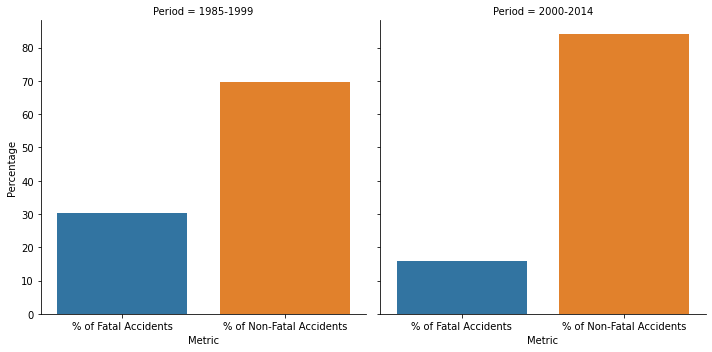

In [68]:
plt.figure(figsize=(8, 8))
sns.catplot(data = df_gby_period, kind='bar', col='Period', x='Metric'
            , y='Percentage', order=['% of Fatal Accidents', '% of Non-Fatal Accidents'])
plt.show()

Looks like the incidents on average have gotten better between the two periods

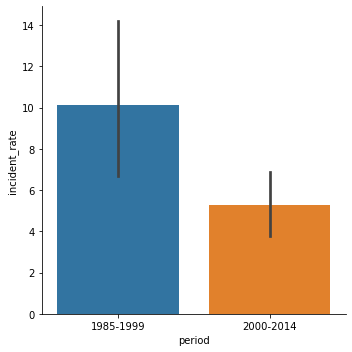

In [69]:
sns.catplot(data=df_clean, kind='bar', x='period', y='incident_rate', order = ['1985-1999', '2000-2014'])

What about fatal accidents?

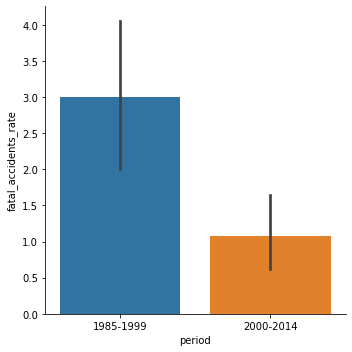

In [70]:
sns.catplot(data=df_clean, kind='bar', x='period', y='fatal_accidents_rate', order = ['1985-1999', '2000-2014'])

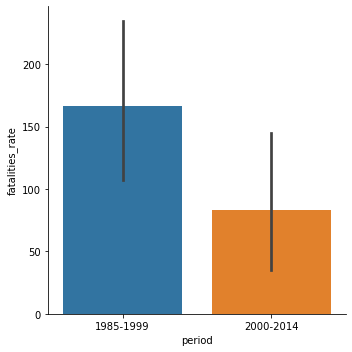

In [71]:
sns.catplot(data=df_clean, kind='bar', x='period', y='fatalities_rate', order = ['1985-1999', '2000-2014'])

#### Airline % Change From 1985-1999 to 2000-2014

Which airline became the safest between the two periods in terms of accidents?

Which airlines stayed safe consistently between the two periods?

Calculate % change


In [72]:
cols = ['airline', 'incident_rate_85_99', 'incident_rate_00_14'
        , 'fatal_accidents_rate_85_99', 'fatal_accidents_rate_00_14']
df_perc = df.loc[:, cols]

In [73]:
df_perc.head()

,airline,incident_rate_85_99,incident_rate_00_14,fatal_accidents_rate_85_99,fatal_accidents_rate_00_14
0,Aer Lingus,7.990180,0.000000,0.000000,0.000000
1,Aeroflot*,81.354387,6.422715,14.986334,1.070452
2,Aerolineas Argentinas,19.938401,3.323067,0.000000,0.000000
3,Aeromexico*,6.443852,10.739754,2.147951,0.000000
4,Air Canada,1.374667,1.374667,0.000000,0.000000


In [74]:
df['Incident Rate % Change'] = ((df.incident_rate_00_14 - df.incident_rate_85_99) \
                                    / df.incident_rate_85_99 * 100)

df['Fatal Accidents Rate % Change'] = ((df.fatal_accidents_rate_00_14 - df.fatal_accidents_rate_85_99) \
                                            / df.fatal_accidents_rate_85_99 * 100)

df_perc['Fatal Accidents Rate % Change'].fillna(0, inplace = True)

KeyError: 'Fatal Accidents Rate % Change'

In [ ]:
df['Incident Rate % Change'].apply(lambda i : "{0:.2f}%".format(i))

In [ ]:
df_perc.sort_values(by='Incident Rate % Change').head()

#### Scatterplots

In [ ]:
plt.figure(figsize=(10, 10))
sns.regplot(data=df, x = 'fatal_accidents_rate_85_99', y = 'fatal_accidents_rate_00_14')
plt.show()

print(df.corr()['fatal_accidents_rate_85_99']['fatal_accidents_rate_00_14'])

In [ ]:
plt.figure(figsize=(8, 8))
sns.regplot(data=df, x = 'incident_rate_85_99', y = 'incident_rate_00_14', fit_reg = True)
plt.show()

print(df.corr()['incident_rate_85_99']['incident_rate_00_14'])

#### Cross-tab view between the two periods that compare - with heatmap applied

I will need to figure out the best method in plotly - dash

In [ ]:
df_clean

#### Comparison Generator

I want to find the three most comparable airlines to compare against

In [ ]:
# Recursive Query
# (df.avail_seat_km_per_week * 52 * 15)
query = """
SELECT
    airline
    , avail_seat_km
    , comp_avail_seat_km    
    , comp_airline
    , comp_percentage
FROM
(
    SELECT
        a.airline
        , a.avail_seat_km
        , a.comp_avail_seat_km
        , a.comp_airline
        , a.comp_percentage
        , ROW_NUMBER() OVER(PARTITION BY a.airline ORDER BY a.comp_percentage DESC) AS comp_rank
    FROM
    (
        SELECT
            a.airline
            , (a.avail_seat_km_per_week * 52 * 15) AS avail_seat_km
            , b.airline AS comp_airline
            , (b.avail_seat_km_per_week * 52 * 15) AS comp_avail_seat_km
            , CAST(((a.avail_seat_km_per_week * 52 * 15) - (b.avail_seat_km_per_week * 52 * 15)) AS float) / (b.avail_seat_km_per_week * 52 * 15) AS comp_percentage
        FROM
            airline_safety AS a
            LEFT JOIN airline_safety AS b
                ON a.airline != b.airline
    ) AS a
)
WHERE
    comp_rank IN (1, 2, 3)
;
"""

airline_comp = pd.read_sql_query(query, conn)

In [ ]:
# Recursive Query
# (df.avail_seat_km_per_week * 52 * 15)
query = """
SELECT
    airline 
    , comp_airline
FROM
(
    SELECT
        a.airline
        , a.avail_seat_km
        , a.comp_avail_seat_km
        , a.comp_airline
        , a.comp_percentage
        , ROW_NUMBER() OVER(PARTITION BY a.airline ORDER BY a.comp_percentage DESC) AS comp_rank
    FROM
    (
        SELECT
            a.airline
            , (a.avail_seat_km_per_week * 52 * 15) AS avail_seat_km
            , b.airline AS comp_airline
            , (b.avail_seat_km_per_week * 52 * 15) AS comp_avail_seat_km
            , CAST(((a.avail_seat_km_per_week * 52 * 15) - (b.avail_seat_km_per_week * 52 * 15)) AS float) / (b.avail_seat_km_per_week * 52 * 15) AS comp_percentage
        FROM
            airline_safety AS a
            LEFT JOIN airline_safety AS b
                ON a.airline != b.airline
    ) AS a
)
WHERE
    comp_rank IN (1, 2, 3)
;
"""

airline_comp = pd.read_sql_query(query, conn)

In [ ]:
airline_comp.loc[airline_comp.airline == 'Aer Lingus']

In [75]:

def get_comp_airline(airline):
    # Recursive Query
    query = """
      SELECT
          airline 
          , comp_airline
      FROM
      (
          SELECT
              a.airline
              , a.avail_seat_km
              , a.comp_avail_seat_km
              , a.comp_airline
              , a.comp_percentage
              , ROW_NUMBER() OVER(PARTITION BY a.airline ORDER BY a.comp_percentage DESC) AS comp_rank
          FROM
          (
              SELECT
                  a.airline
                  , (a.avail_seat_km_per_week * 52 * 15) AS avail_seat_km
                  , b.airline AS comp_airline
                  , (b.avail_seat_km_per_week * 52 * 15) AS comp_avail_seat_km
                  , CAST(((a.avail_seat_km_per_week * 52 * 15) - (b.avail_seat_km_per_week * 52 * 15)) AS float) / (b.avail_seat_km_per_week * 52 * 15) AS comp_percentage
              FROM
                  airline_safety AS a
                  LEFT JOIN airline_safety AS b
                      ON a.airline != b.airline
          ) AS a
      )
      WHERE
          comp_rank IN (1, 2, 3)
      ;
    """

    airline_comp = pd.read_sql_query(query, conn)
    #eturn airline_comp

    airline_comparison_list = airline_comp.loc[airline_comp['airline'] == airline , 'comp_airline']

    return airline_comparison_list

In [76]:
get_comp_airline('Aer Lingus')

0               TACA
1      Kenya Airways
2    Royal Air Maroc
Name: comp_airline, dtype: object

In [77]:
get_comp_airline('Air Canada')

12               TACA
13      Kenya Airways
14    Royal Air Maroc
Name: comp_airline, dtype: object

In [87]:

def get_comp_airline2():
    # Recursive Query
    query = """
      SELECT
          *
      FROM
      (
          SELECT
              a.airline
              , a.avail_seat_km
              , a.comp_avail_seat_km
              , a.comp_airline
              , a.comp_percentage
              , ROW_NUMBER() OVER(PARTITION BY a.airline ORDER BY a.comp_percentage DESC) AS comp_rank
          FROM
          (
              SELECT
                  a.airline
                  , (a.avail_seat_km_per_week * 52 * 15) AS avail_seat_km
                  , b.airline AS comp_airline
                  , (b.avail_seat_km_per_week * 52 * 15) AS comp_avail_seat_km
                  , ABS(CAST(((a.avail_seat_km_per_week * 52 * 15) - (b.avail_seat_km_per_week * 52 * 15)) AS float)) / (b.avail_seat_km_per_week * 52 * 15) AS comp_percentage
              FROM
                  airline_safety AS a
                  LEFT JOIN airline_safety AS b
                      ON a.airline != b.airline
          ) AS a
      )
      ;
    """

    airline_comp = pd.read_sql_query(query, conn)
    #eturn airline_comp
    return airline_comp

In [88]:
x = get_comp_airline2()

In [89]:
x.loc[x.airline == 'United / Continental*', :]

,airline,avail_seat_km,comp_avail_seat_km,comp_airline,comp_percentage,comp_rank
2860,United / Continental*,5568647206980,202311209880,TACA,26.525154,1
2861,United / Continental*,5568647206980,216383539320,Kenya Airways,24.735078,2
2862,United / Continental*,5568647206980,230650164420,Royal Air Maroc,23.143261,3
2863,United / Continental*,5568647206980,235076214360,Gulf Air,22.688688,4
2864,United / Continental*,5568647206980,250307252520,Aer Lingus,21.247247,5
2865,United / Continental*,5568647206980,253954721280,Sri Lankan / AirLanka,20.927717,6
2866,United / Continental*,5568647206980,261649457940,El Al,20.282854,7
2867,United / Continental*,5568647206980,271879246860,Pakistan International,19.482061,8
2868,United / Continental*,5568647206980,279427061940,Austrian Airlines,18.928804,9
2869,United / Continental*,5568647206980,300926845440,Aerolineas Argentinas,17.504986,10


In [90]:
x.loc[x.airline == 'Air Canada', :]

,airline,avail_seat_km,comp_avail_seat_km,comp_airline,comp_percentage,comp_rank
220,Air Canada,1454897965560,202311209880,TACA,6.191386,1
221,Air Canada,1454897965560,216383539320,Kenya Airways,5.723700,2
222,Air Canada,1454897965560,230650164420,Royal Air Maroc,5.307812,3
223,Air Canada,1454897965560,235076214360,Gulf Air,5.189048,4
224,Air Canada,1454897965560,250307252520,Aer Lingus,4.812448,5
225,Air Canada,1454897965560,253954721280,Sri Lankan / AirLanka,4.728966,6
226,Air Canada,1454897965560,261649457940,El Al,4.560485,7
227,Air Canada,1454897965560,271879246860,Pakistan International,4.351265,8
228,Air Canada,1454897965560,279427061940,Austrian Airlines,4.206718,9
229,Air Canada,1454897965560,300926845440,Aerolineas Argentinas,3.834723,10


In [83]:
df.sort_values(by='avail_seat_km')

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14,avail_seat_km,incident_rate_85_99,fatal_accidents_rate_85_99,fatalities_rate_85_99,incident_rate_00_14,fatal_accidents_rate_00_14,fatalities_rate_00_14,Incident Rate % Change,Fatal Accidents Rate % Change
46,TACA,259373346,3,1,3,1,1,3,202311209880,14.828640,4.942880,14.828640,4.942880,4.942880,14.828640,-66.666667,0.000000
29,Kenya Airways,277414794,2,0,0,2,2,283,216383539320,9.242847,0.000000,0.000000,9.242847,9.242847,1307.862885,0.000000,inf
38,Royal Air Maroc,295705339,5,3,51,3,0,0,230650164420,21.677851,13.006711,221.114085,13.006711,0.000000,0.000000,-40.000000,-100.000000
25,Gulf Air,301379762,1,0,0,3,1,143,235076214360,4.253940,0.000000,0.000000,12.761819,4.253940,608.313352,200.000000,inf
0,Aer Lingus,320906734,2,0,0,0,0,0,250307252520,7.990180,0.000000,0.000000,0.000000,0.000000,0.000000,-100.000000,NaN
44,Sri Lankan / AirLanka,325582976,2,1,14,4,0,0,253954721280,7.875420,3.937710,55.127937,15.750839,0.000000,0.000000,100.000000,-100.000000
21,El Al,335448023,1,1,4,1,0,0,261649457940,3.821907,3.821907,15.287630,3.821907,0.000000,0.000000,0.000000,-100.000000
35,Pakistan International,348563137,8,3,234,10,2,46,271879246860,29.424828,11.034310,860.676211,36.781035,7.356207,169.192759,25.000000,-33.333333
12,Austrian Airlines,358239823,1,0,0,1,0,0,279427061940,3.578751,0.000000,0.000000,3.578751,0.000000,0.000000,0.000000,NaN
2,Aerolineas Argentinas,385803648,6,0,0,1,0,0,300926845440,19.938401,0.000000,0.000000,3.323067,0.000000,0.000000,-83.333333,NaN
